<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/Copy_of_CKD_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#importing all libraries and data needed for this exercise
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statistics
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats

CKData = pd.read_excel('CKD_DATA.xlsx')
#pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)



In [25]:
#viewing the head of the data set
CKData

,YEAR,CATEGORY_CODE,AGE,GENDER,RACE,AGE AT BIOPSY,ONSET TO BIOPSY TIME,M,E,S,...,L_MAP.1,L_CRETININE,L_eGFR,L_HEMATURIA,L_PROTEINURIA,L_UPCR,Unnamed: 104,OUTCOME,FUT,Unnamed: 107
0,2012,12305,40,FEMALE,MELAYU,30,30,1,0.0,1,...,110.0,803,5,-,-,0.67,NaN,ESRD,120,NaN
1,2012,4292,38,FEMALE,MELAYU,28,36,1,0.0,1,...,137.0,417,11,TRACE,1+,0.08,NaN,50PERC,60,NaN
2,2012,3213,38,FEMALE,MELAYU,27,9,1,NaN,1,...,146.0,59,120,1+,0,0.09,NaN,NO,48,NaN
3,2012,10911,41,FEMALE,MELAYU,31,10,0,1.0,1,...,131.0,70,96,1+,TRACE,0.02,NaN,NO,120,NaN
4,2012,7084,34,MALE,MELAYU,24,5,0,1.0,1,...,121.0,91,98,TRACE,4+,0.31,NaN,NO,120,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2020,3464,34,MALE,MELAYU,32,12,1,0.0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,21,NaN
77,2017,4265,31,FEMALE,MELAYU,25,40,1,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESRD,10,NaN
78,2019,255,38,FEMALE,MELAYU,34,44,1,0.0,1,...,116.0,95,NaN,NEG,2+,0.26,NaN,NO,18,NaN
79,2019,1996,24,FEMALE,MELAYU,21,12,1,0.0,1,...,89.0,65,NaN,1+,NEG,0.01,NaN,NO,43,NaN


In [26]:
#SELECTING THE NEEDED COLUMNS FOR THE ANALYSIS
df1 = CKData[['AGE', 'GENDER', 'B_PROTEIN', 'B_ALBUMIN',	'B_CHOLESTEROL',	'B_HEMATOCRIT', 'B_PLATELET',	'WBC',
                             'NEUTRO',	'LYMPHO',	'NLR',	'B_SBP',	'B_DBP',	'B_PP', 'B_MAP',	'HEMATURIA',	'B_creatinine',
                             'B_eGFR',	'B_UPCR',	'B_ACE',	'B_STEROID',	'B_CYTOTOXICS',	'B_AZATHIOPRINE', 'ONSET TO BIOPSY TIME', 'FUT', 'OUTCOME']]

In [27]:
#showing last 10 observations in the data newly created data column called df1
df1.tail(10)

,AGE,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,...,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,ONSET TO BIOPSY TIME,FUT,OUTCOME
71,24,FEMALE,72.0,35,5.76,11.7,256,12.00,8.59,2.63,...,121,55,0.29,1,0,0,0,60,6,NO
72,23,MALE,66.0,36,4.76,15.7,277,8.71,4.40,2.82,...,93,103,0.09,0,1,0,0,12,6,NO
73,37,MALE,NaN,28,6.19,14.3,336,15.80,10.83,3.84,...,378,18,0.76,1,0,0,0,12,6,ESRD
74,26,MALE,41.0,8,NaN,16.2,269,10.80,7.82,2.18,...,74,126,0.81,1,1,0,0,3,38,NO
75,26,FEMALE,71.0,34,5.76,12.1,295,8.00,5.18,1.70,...,162,39,0.31,0,0,0,0,26,21,NO
76,34,MALE,NaN,39,5.08,15.4,262,9.50,5.22,3.52,...,121,70,0.20,0,0,0,0,12,21,NO
77,31,FEMALE,54.0,22,9.65,10.9,388,7.00,4.13,2.04,...,207,29,0.94,1,1,0,0,40,10,ESRD
78,38,FEMALE,73.0,33,6.12,12.7,273,8.30,4.04,3.32,...,90,74,0.17,1,0,0,0,44,18,NO
79,24,FEMALE,NaN,38,4.28,12.8,399,9.40,6.48,2.17,...,67,115,0.18,1,0,0,0,12,43,NO
80,34,MALE,50.0,18,5.71,15.6,410,7.50,4.28,2.35,...,132,65,1.05,1,0,0,0,7,12,NO


In [ ]:
#checking out the gender column
df1['GENDER'].describe()

count         81
unique         2
top       FEMALE
freq          60
Name: GENDER, dtype: object

In [ ]:
#checking out the haematuria column
df1['HEMATURIA'].describe()

count     81
unique     6
top       2+
freq      24
Name: HEMATURIA, dtype: object

In [ ]:
#checking out the outcome column
df1['OUTCOME'].describe()

count     81
unique     3
top       NO
freq      60
Name: OUTCOME, dtype: object

In [28]:
#viewing all columns with empty observation
df1[df1.columns[df1.isna().any()]]

,B_PROTEIN,B_CHOLESTEROL,B_SBP,B_DBP,B_PP,B_MAP,B_UPCR,ONSET TO BIOPSY TIME
0,71.0,3.78,139.0,96.0,43.0,110.0,0.11,30
1,68.0,NaN,120.0,81.0,39.0,94.0,0.40,36
2,63.0,NaN,149.0,103.0,46.0,118.0,0.26,9
3,73.0,6.97,132.0,78.0,54.0,96.0,0.14,10
4,50.0,8.65,135.0,82.0,53.0,100.0,0.63,5
...,...,...,...,...,...,...,...,...
76,NaN,5.08,144.0,88.0,56.0,107.0,0.20,12
77,54.0,9.65,144.0,107.0,37.0,119.0,0.94,40
78,73.0,6.12,138.0,83.0,55.0,101.0,0.17,44
79,NaN,4.28,129.0,69.0,60.0,89.0,0.18,12


In [29]:
#Filling out missing values with mean valuee of the column
df1[['B_PROTEIN',	'B_CHOLESTEROL',	'B_SBP',	'B_DBP', 'ONSET TO BIOPSY TIME',	'B_PP',	'B_MAP',	'B_UPCR']] = df1[
    ['B_PROTEIN', 'ONSET TO BIOPSY TIME','B_CHOLESTEROL',	'B_SBP', 'B_DBP',	'B_PP',	'B_MAP','B_UPCR']].fillna(df1[
        ['B_PROTEIN', 'B_CHOLESTEROL', 'ONSET TO BIOPSY TIME',	'B_SBP','B_DBP', 'B_PP','B_MAP',	'B_UPCR']].mean())

 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
df1['BIOPSY'] = df1['ONSET TO BIOPSY TIME']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#checking if any column still has empty observation
df1.isnull().any()

AGE                     False
GENDER                  False
B_PROTEIN               False
B_ALBUMIN               False
B_CHOLESTEROL            True
B_HEMATOCRIT            False
B_PLATELET              False
WBC                     False
NEUTRO                  False
LYMPHO                  False
NLR                     False
B_SBP                   False
B_DBP                   False
B_PP                    False
B_MAP                   False
HEMATURIA               False
B_creatinine            False
B_eGFR                  False
B_UPCR                  False
B_ACE                   False
B_STEROID               False
B_CYTOTOXICS            False
B_AZATHIOPRINE          False
ONSET TO BIOPSY TIME    False
FUT                     False
OUTCOME                 False
dtype: bool

In [ ]:
df1['B_SBP'].dtype

dtype('float64')

In [31]:
df1

,AGE,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,...,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,ONSET TO BIOPSY TIME,FUT,OUTCOME,BIOPSY
0,40,FEMALE,71.000000,35,30,12.5,311,11.9,6.33,2.87,...,53,0.11,1,0,0,0,96.0,120,ESRD,96.0
1,38,FEMALE,68.000000,33,36,11.7,413,10.7,7.74,1.91,...,86,0.40,0,0,0,0,81.0,60,50PERC,81.0
2,38,FEMALE,63.000000,35,9,12.1,433,13.1,10.90,1.40,...,98,0.26,1,1,0,0,103.0,48,NO,103.0
3,41,FEMALE,73.000000,39,10,13.3,365,15.9,11.90,3.09,...,120,0.14,0,1,0,0,78.0,120,NO,78.0
4,34,MALE,50.000000,20,5,13.2,310,7.3,3.97,2.52,...,124,0.63,0,0,1,0,82.0,120,NO,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,MALE,62.639344,39,12,15.4,262,9.5,5.22,3.52,...,70,0.20,0,0,0,0,88.0,21,NO,88.0
77,31,FEMALE,54.000000,22,40,10.9,388,7.0,4.13,2.04,...,29,0.94,1,1,0,0,107.0,10,ESRD,107.0
78,38,FEMALE,73.000000,33,44,12.7,273,8.3,4.04,3.32,...,74,0.17,1,0,0,0,83.0,18,NO,83.0
79,24,FEMALE,62.639344,38,12,12.8,399,9.4,6.48,2.17,...,115,0.18,1,0,0,0,69.0,43,NO,69.0


In [ ]:
#finding unique values in my data set

pd.unique(df1[['GENDER']].values.ravel())#array(['FEMALE', 'MALE'], dtype=object)

array(['FEMALE', 'MALE'], dtype=object)

In [ ]:
pd.unique(df1['B_CHOLESTEROL'].values.ravel()) #array(['ESRD', '50PERC', 'NO'], dtype=object)

array([30, 36, 9, 10, 5, 1, 6, 60, 96, 2, 4, 23, 22, 15, 24, '-', 11, 26,
       82, 12, 8, 13, nan, 25, 111, 7, 0, 14, 20, 3, 40, 44], dtype=object)

In [ ]:
pd.unique(df1['HEMATURIA'].values.ravel()) #array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

In [ ]:
df1.dtypes


AGE                       int64
GENDER                   object
B_PROTEIN               float64
B_ALBUMIN                 int64
B_CHOLESTEROL            object
B_HEMATOCRIT            float64
B_PLATELET                int64
WBC                     float64
NEUTRO                  float64
LYMPHO                  float64
NLR                     float64
B_SBP                   float64
B_DBP                   float64
B_PP                    float64
B_MAP                   float64
HEMATURIA                object
B_creatinine              int64
B_eGFR                    int64
B_UPCR                  float64
B_ACE                     int64
B_STEROID                 int64
B_CYTOTOXICS              int64
B_AZATHIOPRINE            int64
ONSET TO BIOPSY TIME    float64
FUT                       int64
OUTCOME                  object
dtype: object

In [32]:
#removing empty spaces from the columns of gender, outcome and hemturia
for col in ["GENDER", "OUTCOME", "HEMATURIA"]:
    df1[col] = df1[col].replace("\s+", " ", regex=True).str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
#creating dummy variables for the outcome
df1['OUTCOME_d'] = np.where(df1['OUTCOME'] == 'NO', 0, (np.where(df1['OUTCOME'] == '50PERC', 1, 2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['OUTCOME_d'].describe()

count    81.000000
mean      0.469136
std       0.822898
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: OUTCOME_d, dtype: float64

In [34]:
#replacing the hematuria column with dummy variables
conditions = [
    (df1['HEMATURIA'] == 'NEG'),
    (df1['HEMATURIA'] == 'TRACE'),
    (df1['HEMATURIA'] == '1+'),
    (df1['HEMATURIA'] == '2+'),
    (df1['HEMATURIA'] == '3+'),
    (df1['HEMATURIA'] == '5+'),
]

values = [0, 1, 2, 3, 4, 5]

df1['HEMATURIA_d'] = np.select(conditions, values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
df1['HEMATURIA_d'].describe()

count    81.000000
mean      2.493827
std       1.388556
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: HEMATURIA_d, dtype: float64

In [35]:
#changing the gender column to dummy variables where male =1 and female = 0
df1['GENDER_d'] = np.where(df1["GENDER"] == 'FEMALE', 0 ,1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['GENDER_d'].describe()

count    81.000000
mean      0.259259
std       0.440959
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: GENDER_d, dtype: float64

In [39]:
#SELECTING THE NEWLY CREATED COLUMNS FOR THE ANALYSIS
df2 = df1[['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN',	'B_HEMATOCRIT', 'B_PLATELET',	'WBC', 'B_CHOLESTEROL',
                             'NEUTRO',	'LYMPHO',	'NLR',	'B_DBP', 'B_SBP',	'B_PP', 'B_MAP',	'HEMATURIA_d',	'B_creatinine',
                             'B_eGFR',	'B_UPCR',	'B_ACE',	'B_STEROID',	'B_CYTOTOXICS', 'BIOPSY', 'FUT', 'OUTCOME_d']]

In [40]:
df2.head()

,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,B_CHOLESTEROL,NEUTRO,LYMPHO,...,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,BIOPSY,FUT,OUTCOME_d
0,40,0,71.0,35,12.5,311,11.9,30,6.33,2.87,...,0,121,53,0.11,1,0,0,96.0,120,2
1,38,0,68.0,33,11.7,413,10.7,36,7.74,1.91,...,3,82,86,0.40,0,0,0,81.0,60,1
2,38,0,63.0,35,12.1,433,13.1,9,10.90,1.40,...,0,74,98,0.26,1,1,0,103.0,48,0
3,41,0,73.0,39,13.3,365,15.9,10,11.90,3.09,...,0,59,120,0.14,0,1,0,78.0,120,0
4,34,1,50.0,20,13.2,310,7.3,5,3.97,2.52,...,0,76,124,0.63,0,0,1,82.0,120,0


In [41]:
print(df2.describe())

             AGE   GENDER_d  B_PROTEIN  B_ALBUMIN  B_HEMATOCRIT  B_PLATELET  \
count  81.000000  81.000000  81.000000  81.000000     81.000000   81.000000   
mean   38.185185   0.259259  62.639344  30.074074     12.322222  317.234568   
std    10.141636   0.440959  11.492424   7.575912      1.414567   80.846347   
min    21.000000   0.000000   0.000000   6.000000      9.600000  111.000000   
25%    31.000000   0.000000  60.000000  26.000000     11.400000  269.000000   
50%    37.000000   0.000000  62.639344  33.000000     12.200000  307.000000   
75%    44.000000   1.000000  71.000000  35.000000     13.200000  368.000000   
max    70.000000   1.000000  83.000000  42.000000     16.200000  689.000000   

             WBC     NEUTRO     LYMPHO        NLR  ...  HEMATURIA_d  \
count  81.000000  81.000000  81.000000  81.000000  ...    81.000000   
mean    9.551481   6.042346   2.446049   2.716816  ...     2.493827   
std     3.401446   2.985217   0.711830   2.162902  ...     1.388556   
min 

Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF ALL VARIABLES')

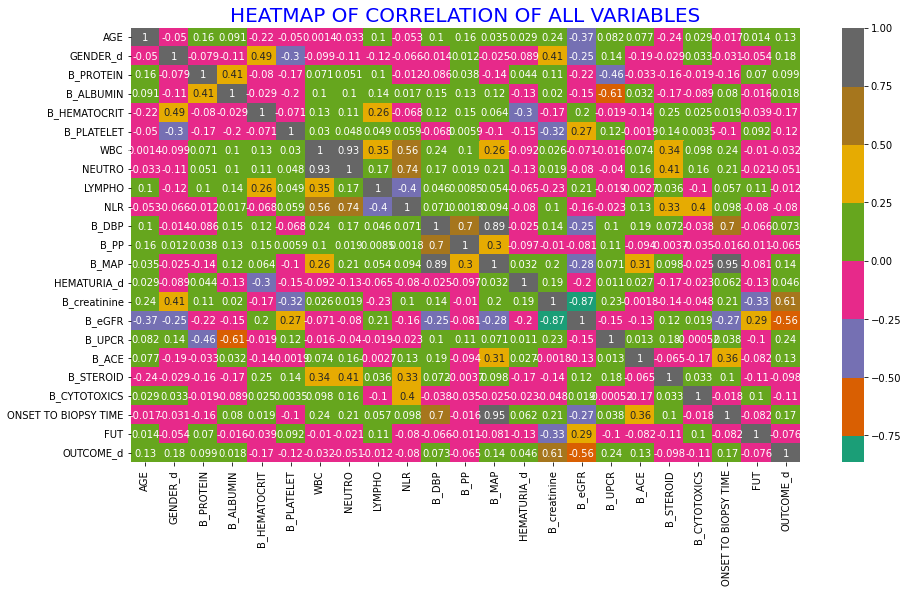

In [ ]:
#plotting the correlation of all variables 
plt.figure(figsize = (15,8))
sns.heatmap(df2.corr(), annot = True, center = 0, cmap = 'Dark2')
plt.title('HEATMAP OF CORRELATION OF ALL VARIABLES', color='b', size=20.0)


Text(0.5, 1.0, 'HEATMAP OF COVARIANCE OF ALL VARIABLES')

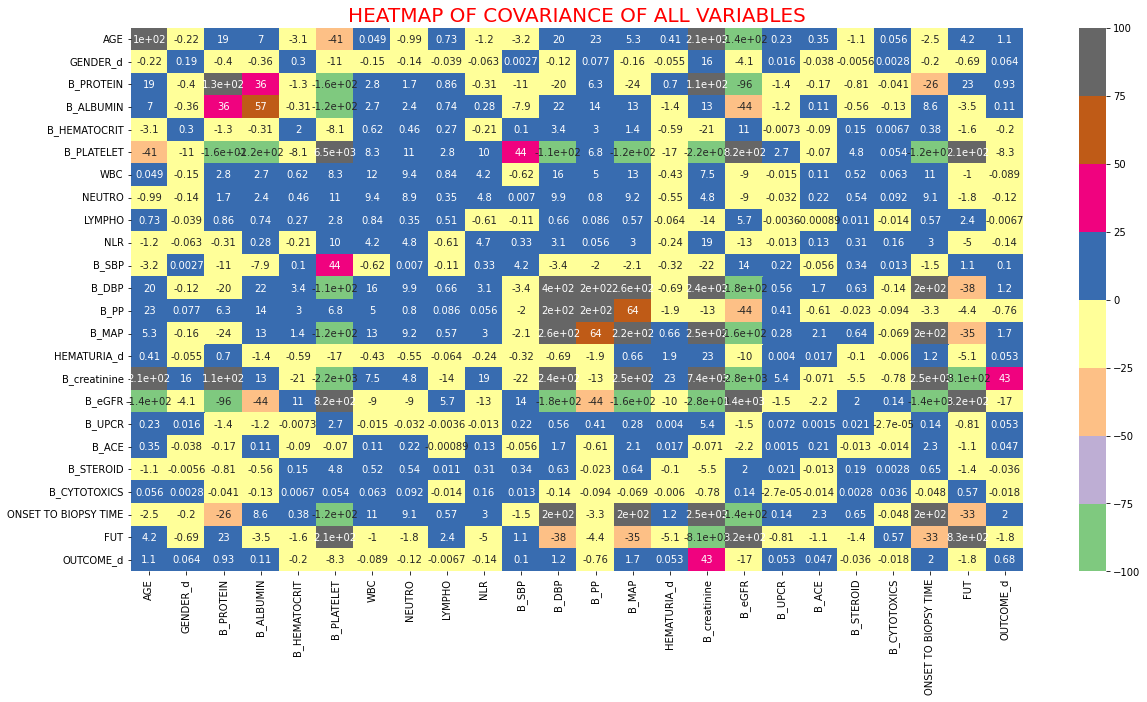

In [ ]:
#plotting the covariance of all variables 
plt.figure(figsize = (20,10))
sns.heatmap(df2.cov(), annot = True, center = 0, vmin = -100, vmax = 100, cmap = 'Accent')
plt.title('HEATMAP OF COVARIANCE OF ALL VARIABLES', color='r', size=20.0)

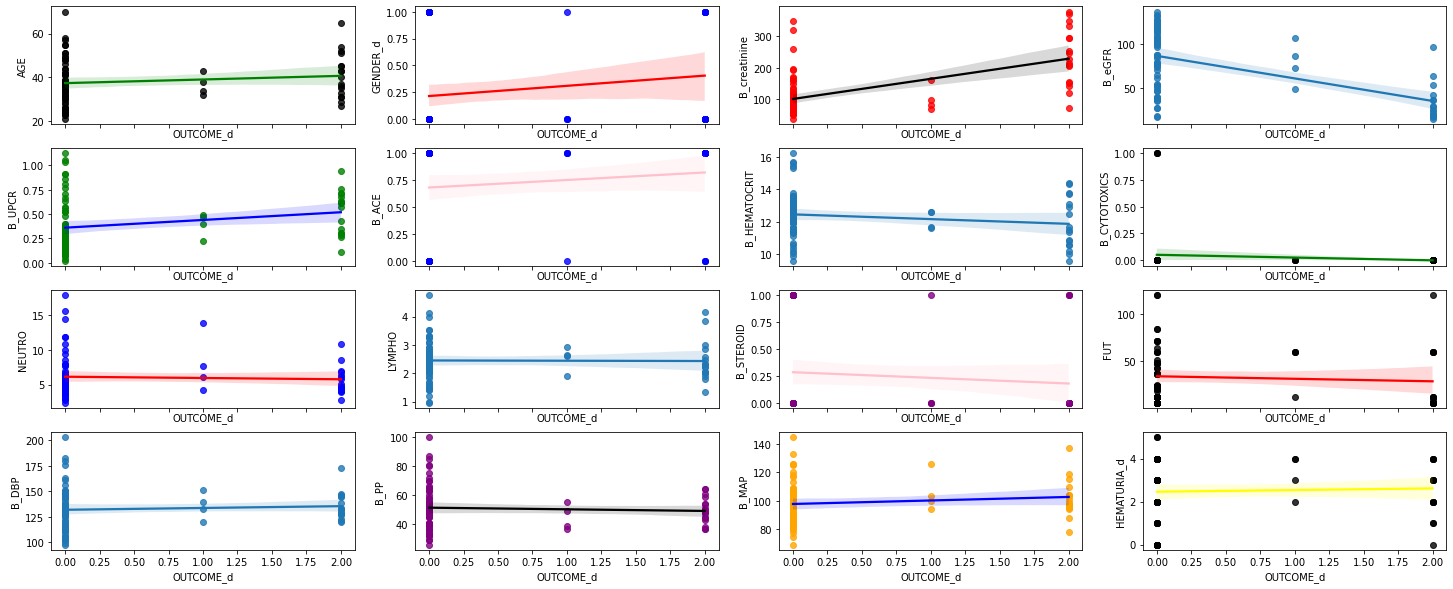

In [ ]:
#This is  regression plot of original dataset over the years
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(25,10), sharex=True)


sns.regplot(data = df2, y = 'AGE', x = 'OUTCOME_d', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = df2, y = 'GENDER_d', x = 'OUTCOME_d', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = df2, y = 'B_creatinine', x = 'OUTCOME_d', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = df2, y = 'B_eGFR', x = 'OUTCOME_d', ax=axs[0,3])

sns.regplot(data = df2, y = 'B_UPCR', x = 'OUTCOME_d',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = df2, y = 'B_HEMATOCRIT', x = 'OUTCOME_d', ax=axs[1,2])
sns.regplot(data = df2, y = 'B_ACE', x = 'OUTCOME_d', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = df2, y = 'B_CYTOTOXICS', x = 'OUTCOME_d', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = df2, y = 'NEUTRO', x = 'OUTCOME_d', ax=axs[2,0],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = df2, y = 'LYMPHO', x = 'OUTCOME_d', ax=axs[2,1])
sns.regplot(data = df2, y = 'B_STEROID', x = 'OUTCOME_d', ax=axs[2,2],
           scatter_kws={"color": "purple"}, line_kws={"color": "pink"})
sns.regplot(data = df2, y = 'FUT', x = 'OUTCOME_d', ax=axs[2,3],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(data = df2, y = 'B_DBP', x = 'OUTCOME_d', ax=axs[3,0])
sns.regplot(data = df2, y = 'B_PP', x = 'OUTCOME_d', ax=axs[3,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = df2, y = 'B_MAP', x = 'OUTCOME_d', ax=axs[3,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = df2, y = 'HEMATURIA_d', x = 'OUTCOME_d', ax=axs[3,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

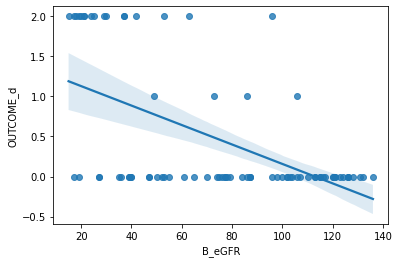

In [ ]:
sns.regplot(data = df2, x = 'B_eGFR', y = 'OUTCOME_d')

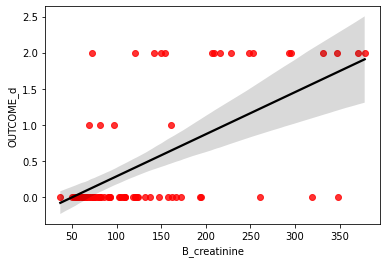

In [ ]:
sns.regplot(data = df2, x = 'B_creatinine', y = 'OUTCOME_d',
           scatter_kws={"color": "red"}, line_kws={"color": "black"})

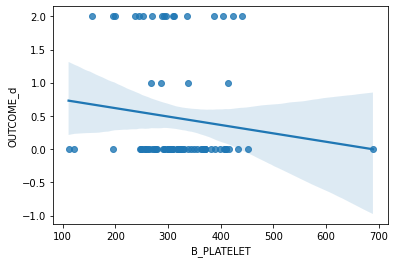

In [ ]:
sns.regplot(data = df2, x = 'B_PLATELET', y = 'OUTCOME_d')

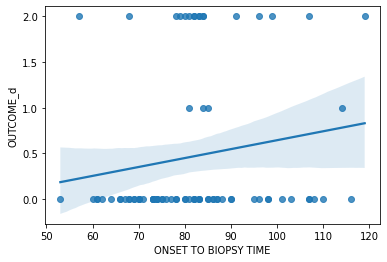

In [ ]:
sns.regplot(data = df2, x = 'ONSET TO BIOPSY TIME', y = 'OUTCOME_d')

Text(0.5, 1.0, 'Survival Curve based on FUT estimated with Kaplan-Meier Fitter')

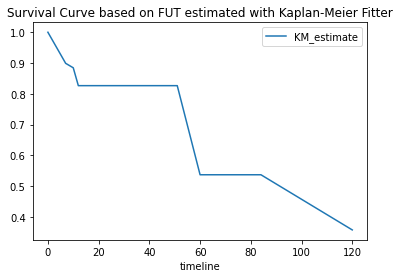

In [42]:

# Initiate and fit follow up time (FUT)
kmf = KaplanMeierFitter()
kmf.fit(durations=df2['FUT'], event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve based on FUT estimated with Kaplan-Meier Fitter')


Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter based on baseline Creatinine')

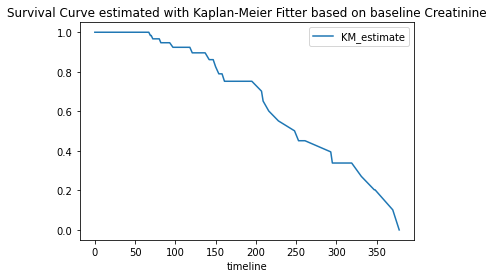

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_creatinine, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter based on baseline Creatinine')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter using basleine cholesterol')

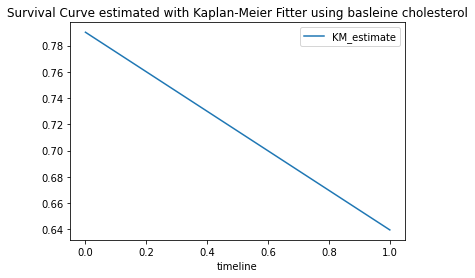

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_STEROID, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using basleine cholesterol')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter using baseline platelet')

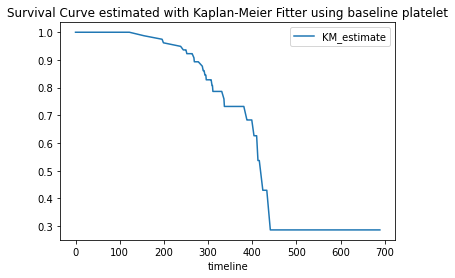

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_PLATELET, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using baseline platelet')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter using baseline pulse pressure')

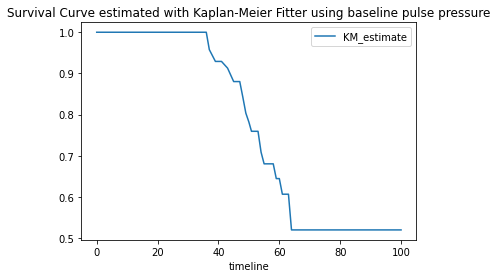

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_PP, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using baseline pulse pressure')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter using B_eGFR')

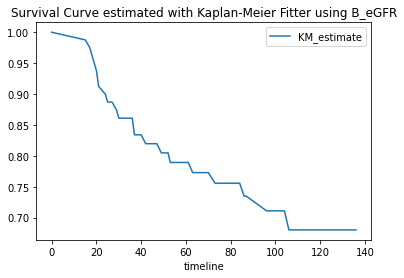

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_eGFR, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using B_eGFR')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter using UPCR')

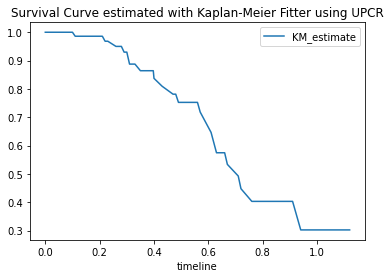

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations= df2.B_UPCR, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using UPCR')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter On cytotoxics')

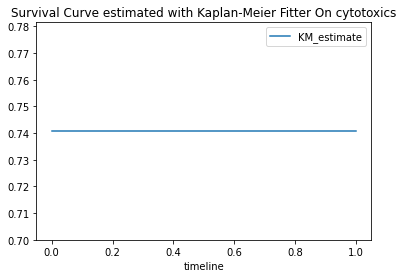

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_CYTOTOXICS, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter On cytotoxics')

In [ ]:
df2.columns

Index(['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'B_CHOLESTEROL',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR', 'B_SBP',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS', 'OUTCOME_d'],
      dtype='object')

In [46]:
mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
Columns = ['GENDER_d', 'B_PROTEIN', 'B_ALBUMIN',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS', 'BIOPSY', 'FUT']
X = mean.fit_transform(df2[Columns])
df_X = pd.DataFrame(X,
                    columns = Columns)
keep = ['AGE', 'OUTCOME_d']
df_keepcolumn = df2[keep]
df = pd.concat([df_keepcolumn, df_X], axis = 1)
df = df.dropna() 
df.isnull().sum()
df.shape

(81, 23)

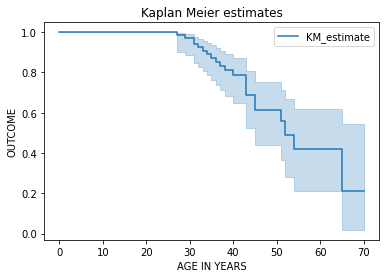

In [47]:
kmf = KaplanMeierFitter()
X = df2['AGE']
Y = df2['OUTCOME_d']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("AGE IN YEARS")
plt.ylabel("OUTCOME")
plt.show()

Text(0, 0.5, 'Survival')

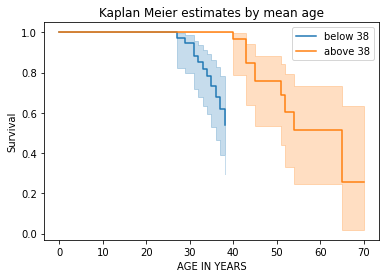

In [ ]:
kmf.survival_function_
age_group = df2['AGE'] < statistics.mean(df2['AGE'])
ax = plt.subplot(111)
kmf.fit(X[age_group], event_observed = Y[age_group], label = 'below 38')
kmf.plot(ax = ax)
kmf.fit(X[~age_group], event_observed = Y[~age_group], label = 'above 38')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean age")
plt.xlabel("AGE IN YEARS")
plt.ylabel("Survival")


In [ ]:
df2.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


AGE                      38.185185
GENDER_d                  0.259259
B_PROTEIN                62.639344
B_ALBUMIN                30.074074
B_HEMATOCRIT             12.322222
B_PLATELET              317.234568
WBC                       9.551481
NEUTRO                    6.042346
LYMPHO                    2.446049
NLR                       2.716816
B_DBP                   132.787500
B_PP                     50.850000
B_MAP                    98.850000
HEMATURIA_d               2.493827
B_creatinine            130.925926
B_eGFR                   74.296296
B_UPCR                    0.397375
B_ACE                     0.716049
B_STEROID                 0.259259
B_CYTOTOXICS              0.037037
ONSET TO BIOPSY TIME     81.937500
FUT                      32.802469
OUTCOME_d                 0.469136
dtype: float64

Text(0, 0.5, 'Survival')

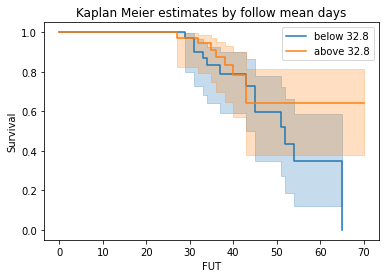

In [ ]:
kmf.survival_function_
FUT_MEAN = df2['FUT'] < statistics.median(df2['FUT'])
ax = plt.subplot(111)
kmf.fit(X[FUT_MEAN], event_observed = Y[FUT_MEAN], label = 'below 32.8')
kmf.plot(ax = ax)
kmf.fit(X[~FUT_MEAN], event_observed = Y[~FUT_MEAN], label = 'above 32.8')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by follow mean days")
plt.xlabel("FUT")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

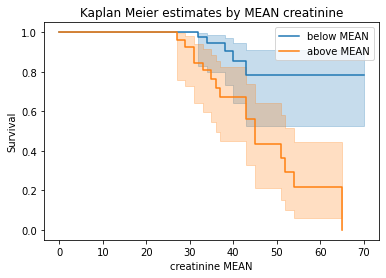

In [ ]:
kmf.survival_function_
biopsy = df2['B_creatinine'] < statistics.mean(df2['B_creatinine'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by MEAN creatinine")
plt.xlabel("creatinine MEAN")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

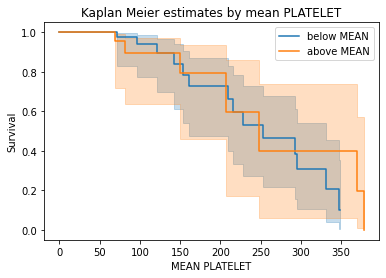

In [ ]:
kmf.survival_function_
biopsy = df2['B_PLATELET'] < statistics.mean(df2['B_PLATELET'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean PLATELET")
plt.xlabel("MEAN PLATELET")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

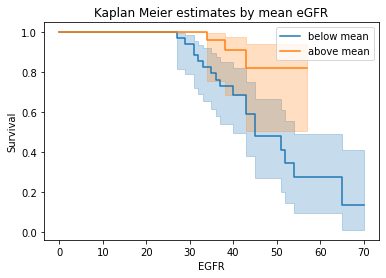

In [ ]:
kmf.survival_function_
biopsy = df2['B_eGFR'] < statistics.mean(df2['B_eGFR'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below mean')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above mean')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean eGFR")
plt.xlabel("EGFR")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

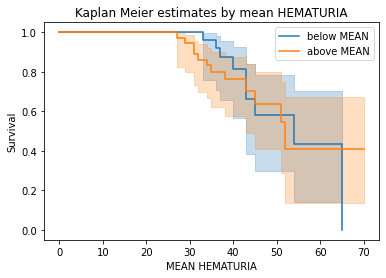

In [50]:
kmf.survival_function_
biopsy = df2['HEMATURIA_d'] < statistics.mean(df2['HEMATURIA_d'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean HEMATURIA")
plt.xlabel("MEAN HEMATURIA")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

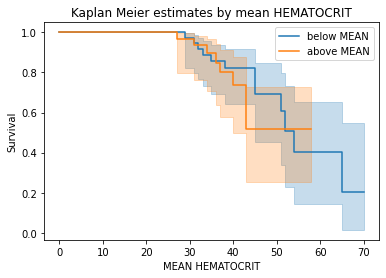

In [49]:
kmf.survival_function_
biopsy = df2['B_HEMATOCRIT'] < statistics.mean(df2['B_HEMATOCRIT'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below MEAN')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above MEAN')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean HEMATOCRIT")
plt.xlabel("MEAN HEMATOCRIT")
plt.ylabel("Survival")

In [ ]:
print(kmf.survival_function_)

          above 81.9
timeline            
0.0         1.000000
21.0        1.000000
24.0        1.000000
25.0        1.000000
26.0        1.000000
29.0        0.971429
31.0        0.914286
32.0        0.885714
34.0        0.857143
35.0        0.822857
37.0        0.788571
38.0        0.788571
40.0        0.736000
42.0        0.736000
43.0        0.535273
44.0        0.535273
46.0        0.535273
49.0        0.535273
50.0        0.535273
51.0        0.401455
54.0        0.200727
65.0        0.000000


In [ ]:
df2['B_eGFR'].describe()

count     81.000000
mean      74.296296
std       37.617963
min       15.000000
25%       39.000000
50%       77.000000
75%      107.000000
max      136.000000
Name: B_eGFR, dtype: float64

In [ ]:
df2

,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,B_CHOLESTEROL,NEUTRO,LYMPHO,NLR,B_DBP,B_PP,B_MAP,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,ONSET TO BIOPSY TIME,FUT,OUTCOME_d
0,40,0,71.000000,35,12.5,311,11.9,30,6.33,2.87,2.2,139.0,43.0,110.0,0,121,53,0.11,1,0,0,96.0,120,2
1,38,0,68.000000,33,11.7,413,10.7,36,7.74,1.91,4.1,120.0,39.0,94.0,3,82,86,0.40,0,0,0,81.0,60,1
2,38,0,63.000000,35,12.1,433,13.1,9,10.90,1.40,7.8,149.0,46.0,118.0,0,74,98,0.26,1,1,0,103.0,48,0
3,41,0,73.000000,39,13.3,365,15.9,10,11.90,3.09,3.9,132.0,54.0,96.0,0,59,120,0.14,0,1,0,78.0,120,0
4,34,1,50.000000,20,13.2,310,7.3,5,3.97,2.52,1.6,135.0,53.0,100.0,0,76,124,0.63,0,0,1,82.0,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,1,62.639344,39,15.4,262,9.5,12,5.22,3.52,1.5,144.0,56.0,107.0,3,121,70,0.20,0,0,0,88.0,21,0
77,31,0,54.000000,22,10.9,388,7.0,40,4.13,2.04,2.0,144.0,37.0,119.0,3,207,29,0.94,1,1,0,107.0,10,2
78,38,0,73.000000,33,12.7,273,8.3,44,4.04,3.32,1.2,138.0,55.0,101.0,0,90,74,0.17,1,0,0,83.0,18,0
79,24,0,62.639344,38,12.8,399,9.4,12,6.48,2.17,3.0,129.0,60.0,89.0,3,67,115,0.18,1,0,0,69.0,43,0


In [ ]:
df2.OUTCOME_d

0     2
1     1
2     0
3     0
4     0
     ..
76    0
77    2
78    0
79    0
80    0
Name: OUTCOME_d, Length: 81, dtype: int64

In [21]:
df2["OUTCOME_d"] = pd.to_numeric(df["OUTCOME_d"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df2.to_csv('ckd.csv') 

In [ ]:
print(kmf.survival_function_)

          above MEAN
timeline            
0.0         1.000000
21.0        1.000000
23.0        1.000000
24.0        1.000000
25.0        1.000000
26.0        1.000000
27.0        0.968750
28.0        0.968750
29.0        0.968750
30.0        0.968750
31.0        0.934152
32.0        0.934152
34.0        0.895229
36.0        0.848111
37.0        0.800994
38.0        0.800994
40.0        0.739379
41.0        0.739379
42.0        0.739379
43.0        0.517565
44.0        0.517565
48.0        0.517565
49.0        0.517565
51.0        0.517565
55.0        0.517565
58.0        0.517565


In [52]:
mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
Columns = ['GENDER_d', 'B_PROTEIN', 'B_ALBUMIN','B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS', 'BIOPSY']
X = mean.fit_transform(df2[Columns])
df_X = pd.DataFrame(X,
                    columns = Columns)
keep = ['B_creatinine', 'OUTCOME_d']
df_keepcolumn = df2[keep]
df = pd.concat([df_keepcolumn, df_X], axis = 1)
df = df.dropna() 
df.isnull().sum()
df.shape

(81, 22)

Text(0, 0.5, 'OUTCOME')

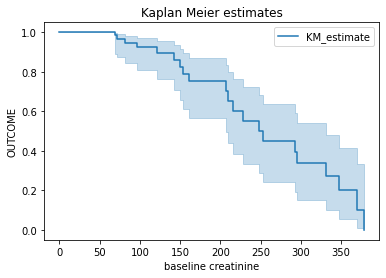

In [ ]:
kmf = KaplanMeierFitter()
X = df2['B_creatinine']
Y = df2['OUTCOME_d']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("baseline creatinine")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'OUTCOME')

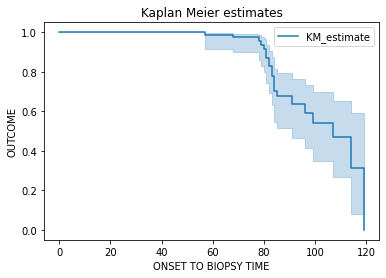

In [ ]:
kmf = KaplanMeierFitter()
X = df2['ONSET TO BIOPSY TIME']
Y = df2['OUTCOME_d']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("ONSET TO BIOPSY TIME")
plt.ylabel("OUTCOME")

Text(0.5, 1.0, 'Survival Function based on FUT')

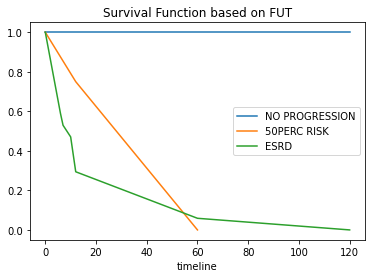

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].FUT,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].FUT, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].FUT, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on FUT')


Text(0.5, 1.0, 'Survival Function based on eGFR')

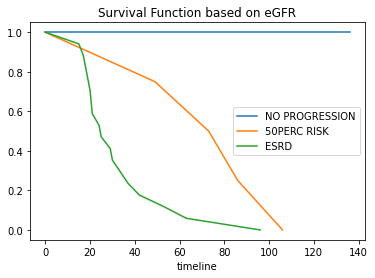

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].B_eGFR,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].B_eGFR, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].B_eGFR, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on eGFR')

Text(0.5, 1.0, 'Survival Function based on age')

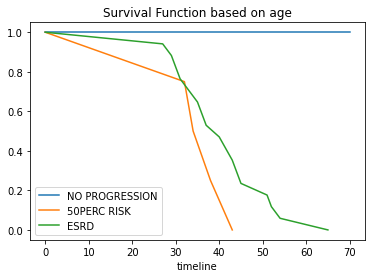

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].AGE,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].AGE, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].AGE, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on age')

In [ ]:
df2['biopsy'] = df2['ONSET TO BIOPSY TIME']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Survival Function based on biopsy time')

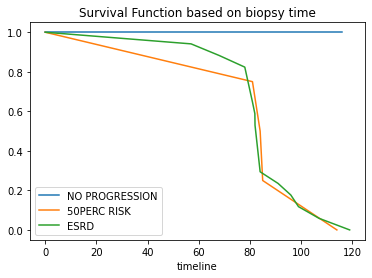

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].biopsy,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].biopsy, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].biopsy, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on biopsy time')

Text(0.5, 1.0, 'Survival Function based on PLATELET')

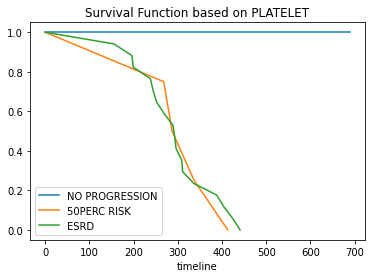

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].B_PLATELET,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].B_PLATELET, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].B_PLATELET, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on PLATELET')

Text(0.5, 1.0, 'Survival Function based on CREATININE')

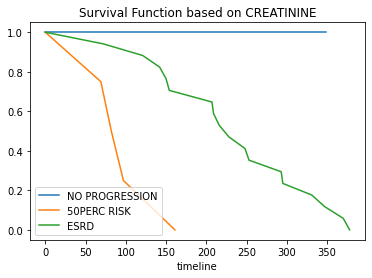

In [ ]:

# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].B_creatinine,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].B_creatinine, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].B_creatinine, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on CREATININE')

Text(0.5, 1.0, 'Survival Function based on HEMATOCRIT')

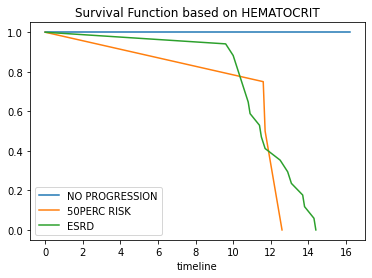

In [ ]:

# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].B_HEMATOCRIT,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].B_HEMATOCRIT, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].B_HEMATOCRIT, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on HEMATOCRIT')

Text(0.5, 1.0, 'Survival Function based on HEMATURIA')

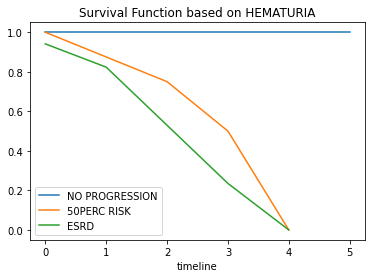

In [ ]:

# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].HEMATURIA_d,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].HEMATURIA_d, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].HEMATURIA_d, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on HEMATURIA')

In [ ]:
df2

,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,B_CHOLESTEROL,NEUTRO,LYMPHO,NLR,B_DBP,B_PP,B_MAP,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,ONSET TO BIOPSY TIME,FUT,OUTCOME_d
0,40,0,71.000000,35,12.5,311,11.9,30,6.33,2.87,2.2,139.0,43.0,110.0,0,121,53,0.11,1,0,0,96.0,120,2
1,38,0,68.000000,33,11.7,413,10.7,36,7.74,1.91,4.1,120.0,39.0,94.0,3,82,86,0.40,0,0,0,81.0,60,1
2,38,0,63.000000,35,12.1,433,13.1,9,10.90,1.40,7.8,149.0,46.0,118.0,0,74,98,0.26,1,1,0,103.0,48,0
3,41,0,73.000000,39,13.3,365,15.9,10,11.90,3.09,3.9,132.0,54.0,96.0,0,59,120,0.14,0,1,0,78.0,120,0
4,34,1,50.000000,20,13.2,310,7.3,5,3.97,2.52,1.6,135.0,53.0,100.0,0,76,124,0.63,0,0,1,82.0,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,1,62.639344,39,15.4,262,9.5,12,5.22,3.52,1.5,144.0,56.0,107.0,3,121,70,0.20,0,0,0,88.0,21,0
77,31,0,54.000000,22,10.9,388,7.0,40,4.13,2.04,2.0,144.0,37.0,119.0,3,207,29,0.94,1,1,0,107.0,10,2
78,38,0,73.000000,33,12.7,273,8.3,44,4.04,3.32,1.2,138.0,55.0,101.0,0,90,74,0.17,1,0,0,83.0,18,0
79,24,0,62.639344,38,12.8,399,9.4,12,6.48,2.17,3.0,129.0,60.0,89.0,3,67,115,0.18,1,0,0,69.0,43,0


In [54]:

## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
df_r= df2.loc[:,['FUT', 'OUTCOME_d', 'AGE','GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR',
                 'B_DBP', 'B_PP', 'B_MAP','B_PLATELET','HEMATURIA_d', 'B_creatinine', 'B_UPCR', 'B_ACE', 'B_STEROID','BIOPSY', 'B_CYTOTOXICS', 'B_eGFR']]
df_r.head() ## have a look at the data

,FUT,OUTCOME_d,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,...,B_MAP,B_PLATELET,HEMATURIA_d,B_creatinine,B_UPCR,B_ACE,B_STEROID,BIOPSY,B_CYTOTOXICS,B_eGFR
0,120,2,40,0,71.0,35,12.5,311,11.9,6.33,...,110.0,311,0,121,0.11,1,0,96.0,0,53
1,60,1,38,0,68.0,33,11.7,413,10.7,7.74,...,94.0,413,3,82,0.40,0,0,81.0,0,86
2,48,0,38,0,63.0,35,12.1,433,13.1,10.90,...,118.0,433,0,74,0.26,1,1,103.0,0,98
3,120,0,41,0,73.0,39,13.3,365,15.9,11.90,...,96.0,365,0,59,0.14,0,1,78.0,0,120
4,120,0,34,1,50.0,20,13.2,310,7.3,3.97,...,100.0,310,0,76,0.63,0,0,82.0,1,124


In [55]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,FUT,OUTCOME_d,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,...,B_MAP,B_PLATELET,HEMATURIA_d,B_creatinine,B_UPCR,B_ACE,B_STEROID,BIOPSY,B_CYTOTOXICS,B_eGFR
0,120,2,40,0,71.0,35,12.5,311,11.9,6.33,...,110.0,311,0,121,0.11,1,0,96.0,0,53
1,60,1,38,0,68.0,33,11.7,413,10.7,7.74,...,94.0,413,3,82,0.40,0,0,81.0,0,86
2,48,0,38,0,63.0,35,12.1,433,13.1,10.90,...,118.0,433,0,74,0.26,1,1,103.0,0,98
3,120,0,41,0,73.0,39,13.3,365,15.9,11.90,...,96.0,365,0,59,0.14,0,1,78.0,0,120
4,120,0,34,1,50.0,20,13.2,310,7.3,3.97,...,100.0,310,0,76,0.63,0,0,82.0,1,124


Text(0.5, 1.0, 'Survival Function based on ALBUMIN')

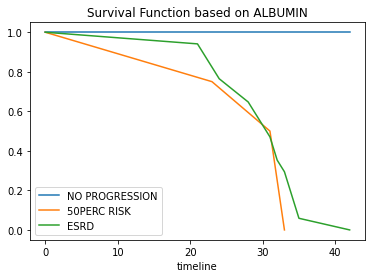

In [44]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].B_ALBUMIN,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].B_ALBUMIN, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].B_ALBUMIN, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on ALBUMIN')

In [56]:
df_binary = df2[['OUTCOME_d', 'B_creatinine']]
  
# Taking only the selected two attributes from the dataset
df_binary.columns = ['OUTCOME_d', 'B_creatinine']
#display the first 5 rows
df_binary.head()

,OUTCOME_d,B_creatinine
0,2,121
1,1,82
2,0,74
3,0,59
4,0,76


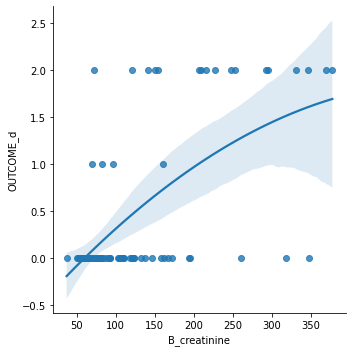

In [66]:

#plotting the Scatter plot to check relationship between creatinine and outcome
sns.lmplot(y ="OUTCOME_d", x ="B_creatinine", data = df_binary, order = 2, ci = 95)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


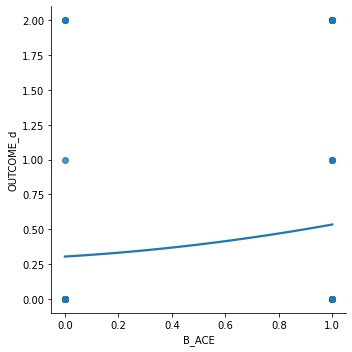

In [62]:
#plotting the Scatter plot to check relationship between creatinine and outcome
sns.lmplot(y ="OUTCOME_d", x ="B_ACE", data = df2, order = 2, ci = None)

In [79]:
X = np.array(df_binary['B_creatinine']).reshape(-1, 1)
y = np.array(df_binary['OUTCOME_d']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0.10832875782059637

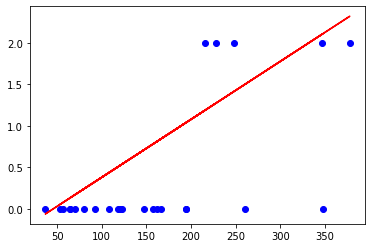

In [81]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='r')

In [84]:
print(regr.score(X_test, y_test))

0.10832875782059637


In [ ]:
df2.columns

Index(['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'B_CHOLESTEROL',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR', 'B_SBP',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS', 'ONSET TO BIOPSY TIME',
       'FUT', 'OUTCOME_d', 'biopsy'],
      dtype='object')

In [ ]:
df2['biopsy'] = df2['ONSET TO BIOPSY TIME']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#At last, we check the performance of the Linear Regression model with help of evaluation metrics. 
#For Regression algorithms we widely use mean_absolute_error, and mean_squared_error metrics to check the model performance. 

  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.3915331535543936
MSE: 0.24407926386423545
RMSE: 0.4940437873956472


In [ ]:

  
# Creating independent and dependent variables.
X, y = df2['B_creatinine'], df2['OUTCOME_d']
  
# Splitting the data into training set and test set.
X_train, X_test, y_train, y_test = X[:60], X[60:], y[:60], y[60:]
  
"""
The training set is already shuffled for us, which is good as this guarantees that all
cross-validation folds will be similar.
"""
  
# Training a binary classifier.
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
  
#Building a dumb classifier that just classifies every single image in the “not-5” class.
  

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
  
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [ ]:
# Creating some predictions.

y_train_pred = cross_val_predict(never_5_clf, X_train, y_train_5, cv=3)
  
#You could make predictions on the test set, but use the test set only at the very end of your project, once you have a classifier that you are ready to launch
  
# Constructing the confusion matrix.

confusion_matrix(y_train_5, y_train_pred)

array([[60]])

In [ ]:
# Finding precision and recall

precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
# To compute the F1 score, simply call the f1_score() function:

f1_score(y_train_5, y_train_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.0

In [ ]:
X = df2[['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR', 'ONSET TO BIOPSY TIME',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS',
       'FUT']]
y = df2['OUTCOME_d']

In [88]:


df = pd.DataFrame(df2)

x = df[['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR', 'BIOPSY',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS',
       'FUT']]
y = df['OUTCOME_d']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.37575195083726853
Coefficients: 
 [-6.85167699e-03 -1.30279901e-01  6.04233736e-03  1.22533890e-02
 -2.86948713e-02  9.57345668e-05 -1.60379355e-02  1.34781944e-02
  5.03809969e-02 -7.06377645e-02  3.01986732e-01  2.38210274e-01
 -6.37764581e-02 -5.40585196e-01 -3.44607140e-02  6.19815091e-03
 -1.64327923e-03  6.71527391e-01  1.60910900e-01  9.40967715e-02
  1.73592774e-01  4.42243576e-03]
                            OLS Regression Results                            
Dep. Variable:              OUTCOME_d   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     2.899
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           0.000693
Time:                        23:00:47   Log-Likelihood:                -69.932
No. Observations:                  81   AIC:                             183.9
Df Residuals:                      59 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model_lin = sm.OLS.from_formula("OUTCOME_d ~ AGE + GENDER_d + B_PROTEIN + B_ALBUMIN + B_HEMATOCRIT + B_PLATELET + WBC + NEUTRO + LYMPHO + NLR  + B_DBP + B_PP + B_MAP + HEMATURIA_d + B_creatinine + B_eGFR + B_UPCR + B_ACE + B_STEROID + B_CYTOTOXICS + FUT", data=df2)
result_lin = model_lin.fit()
print(result_lin.summary())

                            OLS Regression Results                            
Dep. Variable:              OUTCOME_d   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     2.899
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           0.000693
Time:                        09:58:05   Log-Likelihood:                -69.932
No. Observations:                  81   AIC:                             183.9
Df Residuals:                      59   BIC:                             236.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3758      1.854     -0.203   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


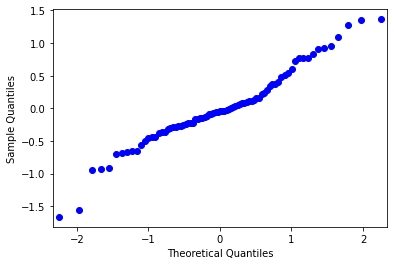

In [89]:
#plotting residual
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
res = model.resid
 
fig = sm.qqplot(res)

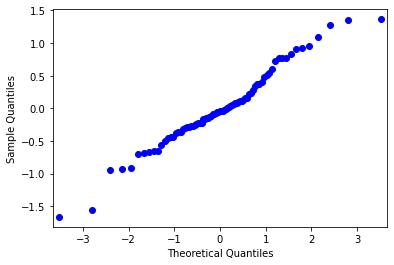

In [ ]:
fig = sm.qqplot(res, stats.t, distargs=(4,))

ValueError: ignored

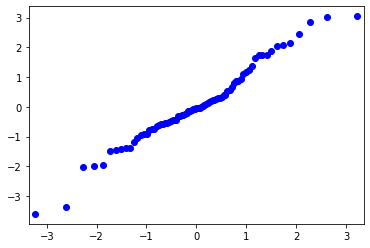

In [90]:
fig = sm.qqplot(res, stats.t, fit=True, line="20")

In [91]:
model_lin = sm.OLS.from_formula("OUTCOME_d ~ AGE + GENDER_d + B_PROTEIN + B_ALBUMIN + BIOPSY + B_HEMATOCRIT + B_PLATELET + WBC + NEUTRO + LYMPHO + NLR  + B_DBP + B_PP + B_MAP + HEMATURIA_d + B_creatinine + B_eGFR + B_UPCR + B_ACE + B_STEROID + B_CYTOTOXICS + FUT", data=df2)
result_lin = model_lin.fit()
print(sm.stats.anova_lm(result_lin, typ=1)) 

                df     sum_sq    mean_sq          F    PR(>F)
AGE            1.0   0.983607   0.983607   2.176502  0.145450
GENDER_d       1.0   1.840313   1.840313   4.072201  0.048149
B_PROTEIN      1.0   0.453344   0.453344   1.003148  0.320640
B_ALBUMIN      1.0   0.008379   0.008379   0.018540  0.892157
BIOPSY         1.0   2.122467   2.122467   4.696545  0.034272
B_HEMATOCRIT   1.0   3.956514   3.956514   8.754881  0.004439
B_PLATELET     1.0   0.000225   0.000225   0.000498  0.982276
WBC            1.0   0.009595   0.009595   0.021231  0.884649
NEUTRO         1.0   0.062872   0.062872   0.139123  0.710491
LYMPHO         1.0   0.558993   0.558993   1.236926  0.270576
NLR            1.0   0.238562   0.238562   0.527885  0.470370
B_DBP          1.0   0.006423   0.006423   0.014214  0.905505
B_PP           1.0   0.425398   0.425398   0.941311  0.335902
B_MAP          1.0   1.552225   1.552225   3.434727  0.068841
HEMATURIA_d    1.0   0.008232   0.008232   0.018215  0.893100
B_creati